In [ ]:
# http://www.bogotobogo.com/Hadoop/BigData_hadoop_Apache_Spark_PySpark_Analyzing_Neuroimaging_Data.php

In [16]:
'''Here's a short snippet showing how to load an image sequence (in this case random data), 
median filter it, transform it to a series, detrend and compute a fourier transform on each pixel, 
then convert it to an array.'''

import thunder as td

data = td.images.fromrandom()
ts = data.median_filter(3).toseries()
frequencies = ts.detrend().fourier(freq=3).toarray()

In [5]:
data

Images
mode: local
dtype: float64
shape: (10, 50, 50)

In [6]:
ts

Series
mode: local
dtype: float64
shape: (50, 50, 10)

In [7]:
frequencies

array([[[ 0.42829192,  1.94967638],
        [ 0.21397471,  1.8155413 ],
        [ 0.36898325,  3.43014757],
        ..., 
        [ 0.44709219,  0.95370562],
        [ 0.66700421,  1.49198005],
        [ 0.5430139 ,  1.43578832]],

       [[ 0.35204782,  1.10592329],
        [ 0.39864074,  1.44609297],
        [ 0.76096735,  3.22751735],
        ..., 
        [ 0.27800793,  1.52358018],
        [ 0.66649283,  1.27051665],
        [ 0.30931227,  5.75354837]],

       [[ 0.25941834,  0.96636991],
        [ 0.26636403,  2.69604312],
        [ 0.51220497,  3.40467941],
        ..., 
        [ 0.28706172,  3.13943088],
        [ 0.21149448,  3.97842039],
        [ 0.27442495,  4.07349411]],

       ..., 
       [[ 0.55683723,  4.20862864],
        [ 0.43936454,  2.77581611],
        [ 0.58518937,  2.40305799],
        ..., 
        [ 0.13222402,  5.29405539],
        [ 0.68270337,  4.74410598],
        [ 0.82247772,  5.05287127]],

       [[ 0.6554234 ,  1.05635636],
        [ 0.51233756,  

In [ ]:
"""Once we have Spark running and Thunder installed, using them together is easy. 
All the loading methods in Thunder take an optional argument engine, 
which can be passed a SparkContext. This is automatically created as the variable sc 
when we start Spark from the executable pyspark.
"""

In [38]:
sc

In [ ]:
"""When we have this variable, just pass it as an argument to a data loading method. 
For example, let's create some random image data in Thunder. 
First, we'll do it LOCALLY"""

In [39]:
from thunder import images
data = images.fromrandom()
data

Images
mode: local
dtype: float64
shape: (10, 50, 50)

In [ ]:
"""If we instead provide a SparkContext as the variable sc, 
we get the same data in DISTRIBUTED form"""

In [40]:
from thunder import images
data = images.fromrandom(engine=sc)
data

Images
mode: spark
dtype: float64
shape: (10, 50, 50)

In [48]:
%matplotlib inline

import matplotlib.pyplot as plt
from showit import image, tile
import thunder as td

In [49]:
data = td.images.fromexample('fish')
data

Images
mode: local
dtype: uint8
shape: (20, 2, 76, 87)

In [ ]:
# These are 20 3d volumes, each one with shape (2, 76, 87).
# Let's look at the first volume

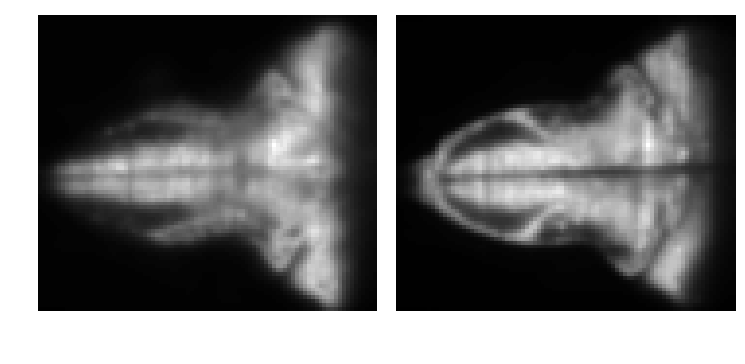

In [52]:
tile(data[0]);

In [ ]:
# Manipulating image

In [59]:
data = td.images.fromexample('fish')

# computing a maximum projection across the z dimension
projections = data.max_projection(axis=0)

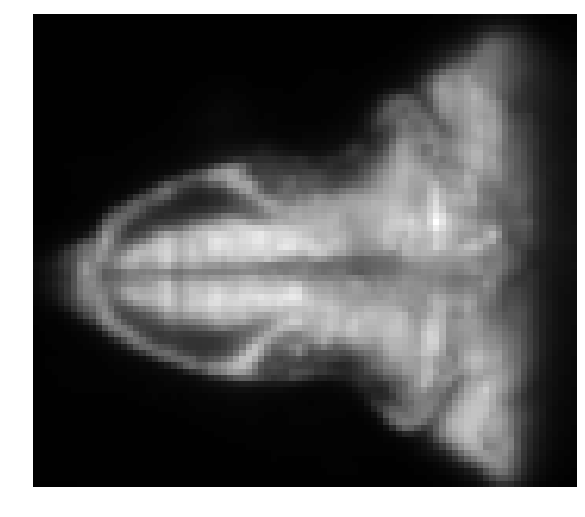

In [60]:
image(projections[0]);

In [62]:
# subselect a set of planes
subset = data[0, 0, :, :]

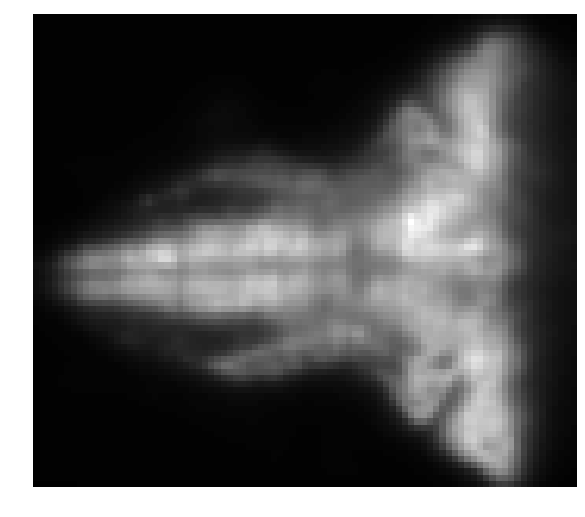

In [63]:
image(subset);

In [64]:
# subsample
subsampled = data.subsample([1,5,5])[0, 0, :, :]

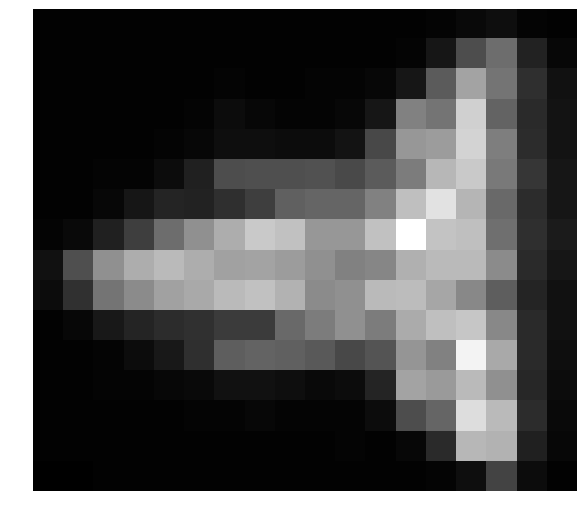

In [65]:
image(subsampled);

In [67]:
# standard deviation
statistic = data.std()[0, 0, :, :]

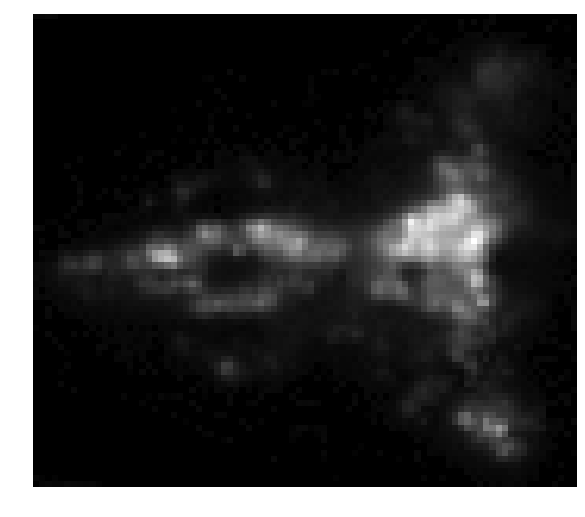

In [68]:
image(statistic);

In [77]:
# Conversions : image -> series
data = td.images.fromexample('fish')
ts = data.toseries()

In [78]:
ts.index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [79]:
ts.shape

(2, 76, 87, 20)

In [80]:
ts.flatten().shape

(13224, 20)

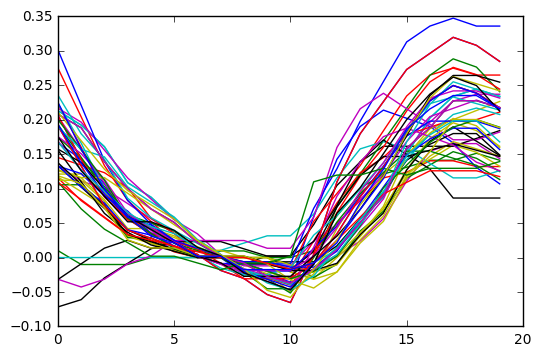

In [81]:
samples = ts.flatten().filter(lambda x: x.std() > 6).normalize().sample(n=50).toarray()
plt.plot(samples.T);

In [85]:
data = td.images.fromtif('/home/k/TEST/PySpark/images')

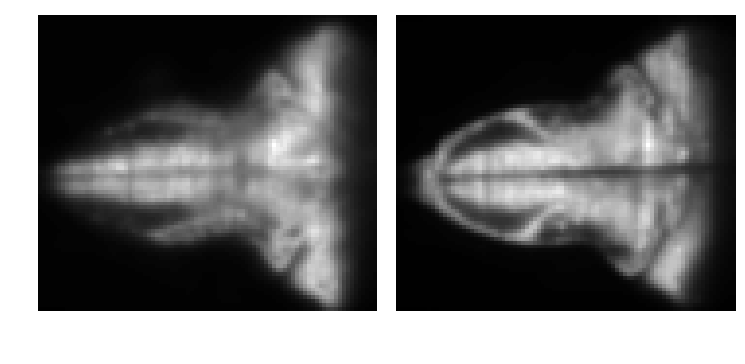

In [83]:
tile(data[0]);